# Problem Set 2

Due in your git fork by 11:59pm Pacfic time on Wednesday, October 25th.

All problems have equal weight.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

## Problem 1: Signal Processing at the High Altitude Water Cerenkov Gamma-ray Observatory (HAWC)

HAWC is a gamma-ray observatory located near the Sierra Negra volcano in Mexico. Its primary science mission is to observe astrophysical gamma-rays in the energy range of 100 GeV to 100 TeV. Astrophysical gamma rays are (thankfully!) filtered by earth’s atmosphere, and never actually make it to the ground. Instead, when they impact an atomic nucleus, they produce an electron-positron pair, which scatter and produce more gamma rays in a cascade known as an “air shower.” When particles from an air shower enter one of the 1200 water tanks that serve as detectors, the particles are traveling faster than the speed of light in water, so they produce Cerenkov radiation. Photomultiplier tubes, capable of detecting single photons of light, are used to measure the Cerenkov radiation. 

In this problem, you will replicate the electronic signal produced by one of HAWC’s photomultiplier tubes. You will then integrate this signal using two different methods. Finally, you will evaluate the practicality of implementing your integration methods in HAWC.

The signal produced by HAWC’s photomultiplier tubes can be simulated by a lognormal distribution:

$$
A\times \mathrm{exp}\left[-\frac{1}{2}\left(\frac{\ln\left(\frac{t}{7}\right)}{0.45}\right)^2\right]
$$

Where A is the amplitude of the signal (frequently given in photoelectrons, or PE), and t is the time after signal detection in nanoseconds. This formula accurately describes the signal detected by a Hamamatsu brand R5912 PMT.

a) Write a function that produces this signal, and plot the results. Start at t = 1 ns, and go to t = 30 ns. Use an amplitude of 5 PE, and go in steps of 0.1 ns.

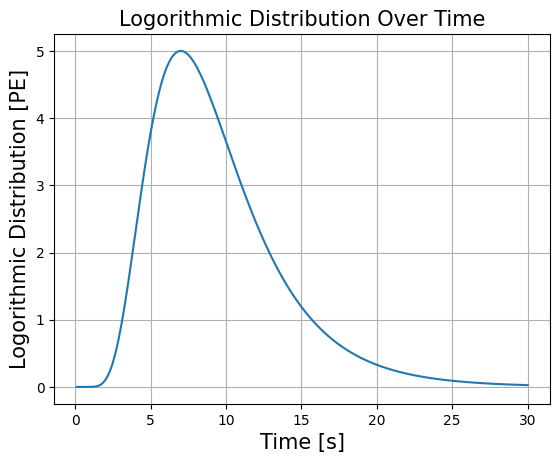

In [2]:
# Defining the function that I will be using
## The parameters will be the amplitude, the initial time, final time, and the increment
def ProblemOneA(A, tInitial, tFinal, step):
    # Making the time variable be the range from initial time to final time incrementing with a set step
    time = np.arange(tInitial, tFinal+0.1, step)
    pMul = []
    for i in range(len(time)):
        f = A*np.exp(-0.5*(np.log(time[i]/7.0)/0.45)**2)
        pMul.append(f)
    return (time, pMul)


(time,valList) = ProblemOneA(5, 0.1, 30, 0.1)
plt.plot(time, valList)
plt.xlabel("Time [s]", size = 15)
plt.ylabel("Logorithmic Distribution [PE]", size = 15)
plt.title("Logorithmic Distribution Over Time", size = 15)
plt.grid()
plt.show()


(b) Write a function that integrates an arbitrary list of x and y data points using the trapezoidal rule. Use your function to integrate the lognormal signal. To check your answer, integrate the same data using a pre-existing integration package/function (for instance, numpy’s “trapz” function). 

In [3]:
def ProblemOneB(x, y):
    h = ((x[len(x)-1] - x[0])/(len(x) - 1))
    weights = []
    for i in range(len(x)):
        if (i == 0) or (i == len(x)-1):
            wi = h/2.0
            weights.append(wi)
        else:
            wi = h
            weights.append(wi)
    integral = 0.0
    for j in range(len(y)):
        integral += weights[j]*y[j]
    return integral

yFunc = 5*np.exp(-0.5*(np.log(time/7.0)/0.45)**2)
yTrue =np.trapz(yFunc, time) 


print("Integration with package function:",yTrue)
print("Integration with my function:",ProblemOneB(time, valList))

Integration with package function: 43.568755583940025
Integration with my function: 43.568755583940025


(c) Write a similar function utilizing Simpson’s rule. Note that this technique re- quires an odd number of data points! Should your function be given an even number of points, print an error message to the user. Your signal from part (a) contains an even number of points. Remove the last point, integrate your signal, and check for consistency with your previous answer. They should be fairly similar. 

In [4]:
# The function takes in sets of values, (x,y), that have an odd number of data points
## The x values correspond to the interval of integration
### The y values correspond to the evaluation of the integrand throughout the interval of integration
def ProblemOneC(x, y):
    h = (x[len(x)-1] - x[0])/(len(x) - 1)
    weightSimp = []
    for i in range(len(x)):
        if (i == 0) or (i == len(timeC)-1):
            wi = h/3.0
            weightSimp.append(wi)
        elif (i%2 != 0):
            wi = (2.0*h)/3.0
            weightSimp.append(wi)
        else:
            wi = (4.0*h)/3.0
            weightSimp.append(wi)
    sum = 0.0
    for j in range(len(x)):
        sum += weightSimp[j]*y[j]
    return sum

timeC = np.delete(time, len(time)-1)        
y = ProblemOneC(timeC, valList)

print("Integral approximation with Simpson:",y)

Integral approximation with Simpson: 43.56512438826683


(d) Gamma rays are not the only astrophysical source of particle showers. Cos- mic rays form a significant background, triggering HAWC’s PMTs at rates of around 10,000 Hz! How long would it take your code to integrate 10,000 sig- nals using the trapezoidal rule? 

(Hint: Python’s `cProfile` module will make easy work of this task. However, a rough estimate is also fine (such as with your wristwatch or cellphone). You could time a single execution and multiply by 10,000, time 10,000 executions directly, or something in between.)

In [5]:
import cProfile
# Execute 10,000 times
(time, value) = ProblemOneA(5, 0.1, 1000, 0.01)
cProfile.run("ProblemOneB(time,value)")

         200007 function calls in 0.087 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.070    0.070    0.087    0.087 811338392.py:1(ProblemOneB)
        1    0.000    0.000    0.087    0.087 <string>:1(<module>)
        1    0.000    0.000    0.087    0.087 {built-in method builtins.exec}
   100003    0.008    0.000    0.008    0.000 {built-in method builtins.len}
   100000    0.008    0.000    0.008    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




Some additional information: the speed of numeric integration is not the limiting factor when analyzing HAWC’s PMT signals. Rather, the challenge lies in reading the PMT signals in a cost-effective manner. Although an oscilloscope would pro- duce an image much like the one you made in part (a), this would be too expensive to utilize for 1200 PMTs. Instead, a flash analog to digital converter (FADC) is used. While FADC’s are much less expensive, they also read the signal at a much lower resolution (as little as two data points per signal!). The experimental design is al- ways a trade-off between capability and cost.

## Problem 2: Romberg Integration

Use Romberg integration to calculate 

$$
\int_{0}^{\pi/2} \frac{d\theta}{1+\cos\theta}
$$

to 8 decimal places of accuracy, as determined from a relative error check. Print out the successive Romberg estimates as a way of showing your work. (Producing a structured printout may be the hard part!)

In order to get $\mathcal{O}\left(h^{6}\right)$, the following system of equations was solved:

\begin{equation}
A(h) \approx \int_{a}^{b}f(x)dx + \alpha h^2 + \beta h^4 + \gamma h^6
\end{equation}
\begin{equation}
A\left(\frac{h}{2}\right) \approx \int_{a}^{b}f(x)dx + \alpha\frac{h^2}{4} + \beta\frac{h^4}{16} + \gamma\frac{h^6}{64}
\end{equation}
\begin{equation}
A\left(\frac{h}{4}\right) \approx \int_{a}^{b}f(x)dx +\alpha\frac{h^2}{16} + \beta\frac{h^4}{256} + \gamma
\frac{h^6}{4096}
\end{equation}
\begin{equation}
A\left(\frac{h}{8}\right) \approx \int_{a}^{b}f(x)dx +\alpha\frac{h^2}{64} + \beta\frac{h^4}{4096} + \gamma
\frac{h^6}{262144}
\end{equation}


Let the tuple we solve for be $(i,j,k,l)$:
\begin{equation}
iA(h) + jA\left(\frac{h}{2}\right)+kA\left(\frac{h}{4}\right)+ lA\left(\frac{h}{8}\right)\\
\approx\left(i+j+k+l\right)\int_{a}^{b}f(x)dx+\alpha h^2\left(i+\frac{j}{4}+\frac{k}{16}+\frac{l}{64}\right)+\beta h^4\left(i+\frac{j}{16}+\frac{k}{256}+\frac{l}{4096}\right)+\gamma h^6\left(i+\frac{j}{64}+\frac{k}{4096}+\frac{l}{262144}\right)
\end{equation}

\begin{equation}
\begin{pmatrix}
1 & 1 & 1 & 1\\
1 & 1/4 & 1/16 & 1/64\\
1 & 1/16 & 1/256 & 1/4096 \\
1 & 1/64 & 1/4096 & 1/262144\\
\end{pmatrix}
\begin{pmatrix}
i\\
j\\
k\\
l\\
\end{pmatrix}
=
\begin{pmatrix}
1\\
0\\
0\\
0\\
\end{pmatrix}
\end{equation}

Using an online solver, the value of the (i, j, k, l) tuple was found, shown below.

\begin{equation}
\begin{pmatrix}
A\left( h \right) & A\left(\frac{h}{2}\right) & A\left(\frac{h}{4}\right) & A\left(\frac{h}{6}\right)
\end{pmatrix}
\begin{pmatrix}
-1/2835\\ 4/135 \\ -64/135 \\ 4096/2835
\end{pmatrix}
\approx
\int_a^bf(x)dx + \mathcal{O}\left(h^6\right)
\end{equation}


In [6]:
import numpy as np

# Function definition for the value of N I will use
def valueN(n,m):
    # Raises 2 to the power of n+m, where m will be varying and n will be set to 5
    valueN = 2**(n+m) # Definition given in the Lecture 2 Notebook
    return valueN


# Trapezoid Function
## Takes in two arrays and the value of N
### The parameter N will be my function valueN
#### The parameter x will be a set of number from the initial to the final value of integration
##### The parameter y will correspond to the value of the integrand, at the respective x value
def TrapOne(x, y, N):
    # Sets the array of the weights
    weights = []
    h = (((x[len(x)-1]-x[0])/(N-1))) # Defines my step
    # The following loop will calculate the weights and create the set.
    ## The initial and final wight will be h/2
    ### The rest of the weights will be h
    for i in range(N):
        if (i == 0):
            wi = h/2.0
            weights.append(wi)
        elif (i == N-1):
            wi = h/2.0
            weights.append(wi)
        else:
            wi = h
            weights.append(wi)
    # Starts my integral at zero
    integral = 0.0
    # The loop cycles throgh the values of the integrand at the respective values of x
    ## Said values are then multiplied with the weights calculated above and summed
    ### The integral value is returned
    for j in range(len(y)):
        integral += weights[j]*y[j]
    return integral

# This is the integrand function
def Integrand(x):
    y = 1.0/(1.0 + np.cos(x))
    return y

# The function for the problem
## It takes in the interval we are integrating over and the N value from valueN
def Problem2(initial, final, N):
    xValues = np.linspace(initial, final, N) # Creates an evenly spaced interval, starting and ending with the limits of integration
    yValues = [] # Array for the values of y, these will be calculated by inputting xValues into Integrand(x)
    # The loop calculates the value of the integrand at xValues and appends them to yValues
    for i in range(N):
        y = Integrand(xValues[i])
        yValues.append(y)
    # Calls my function TrapOne taking in the values found above; returns its value
    valueOne = TrapOne(xValues, yValues, N)
    return (valueOne)

# Definition for the main() function
def main():
    # Limits of integration
    initial = 0.0
    final = np.pi/2.0
    # The loop cycles through 0 -> 8
    ## As it cyles it includes the current i value into valueN function
    for i in range(9):
        N0 = valueN(5, i)
        # The current N0 value is inputted into the Problem2 function alongside the limits of integration
        ## The {y1Whole,...,y1Eighth} correspond to the {A(h),...,A(h/8)} shown in the matrix equation
        y1Whole = Problem2(initial, final, N0)
        y1Half = Problem2(initial, final, N0)
        y1Fourth = Problem2(initial, final, N0)
        y1Eighth = Problem2(initial, final, N0)
        # Calculates the matrix equation shown in the cell above this one
        diff1 = (-17711/41718285)*y1Whole + (185572/5959755)*y1Half + (-2861312/5959755)*y1Fourth + (6718464/4635365)*y1Eighth    
        # Prints the current value of n, and the respective Romber Integration value
        print(f"Output for n={i}: {diff1}".format(i, diff1))

if __name__ == "__main__":
    main()


Output for n=0: 1.0002139155016665
Output for n=1: 1.000051803000293
Output for n=2: 1.0000127481020034
Output for n=3: 1.000003162108546
Output for n=4: 1.0000007874379944
Output for n=5: 1.0000001964749348
Output for n=6: 1.0000000490707628
Output for n=7: 1.0000000122616979
Output for n=8: 1.0000000030646756


## Problem 3 Runge-Kutta Method

(a) Write your own `rk2` ODE solver (see the Lecture-2 notebook). Make it general: have it call a function $f(t,y)$ that you want to integrate (recall, we defined $f(t,y)=\frac{dy}{dt}$), and make the total time and step size easily configurable. 

Try it out first by integrating 

$$f(t)=\sin(\omega t)$$ 

with the initial value of $y=0$ at $t=0$ (set $\omega=1.0$), and let it run forward in time for at least 20 periods. Pick a reasonable $h$ (thereby the total number of time points over the 20 periods) to display the results well. Then, use a canned solver like `odeint` in Scipy. Plot the two results together as a function of time, along with the exact analytic result (you can use the numpy trig function). How do these all compare? Explain why the plot looks the way it does -- specifically the maximum and minimum values of the function.


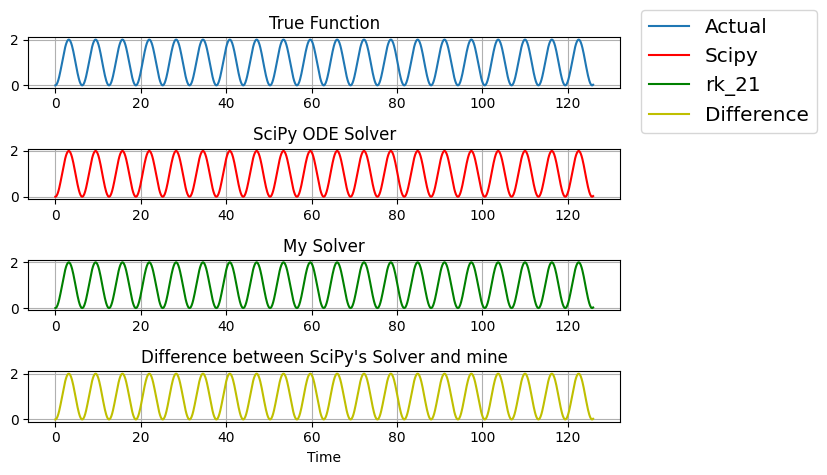

In [7]:
# This is the code for Problem 3 on Homework Two
## The problem asks us to code a RK2 in order to solve second order differential equations

import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# I need to define a function that will take in parameters y and t for any differential equation

##### Trial One #####

## The function in question, in he first part, sin(w*t)
### The second parameter is the initial value of the integral
#### The third parameter is the initial time

#Function for Part A
# y_0, t_0 = 0, 0
def fPA(y, t):
    omega = 1.
    return np.sin(omega*t)


def rk_21(y, t, h):
    N = 126 # Since T = 1/20, and w = 2*pi/T=40*pi => w=126 => t \in [0,125]
    #The time over a set line space from t->N, taking step of length h
    time = np.arange(t, N, h)    
    yVal = y    # Initial value is y_0
    k_1 = []    # Array of k_1
    k_2 = []    # Array of k_2
    y_PO = []   # Array for y Plus One
    y_PO = np.append(y_PO, y)       # Adds y_0 to the array of y values
    for i in range(len(time)-1):    # I have to make it this way because y_PO has one more element than time
        # For the following, any call to fPA refers to the given sine function.
        k_1 = np.append(k_1, h*fPA(y_PO[i], time[i]))     # Evaluates the first term of the approximation
        k_2 = np.append(k_2, h*fPA(0, time[i]+(h/2.)))  # Evaluates the second term of the approximation
        # Appends to the array of y_PO given the initial value y_0
        y_PO = np.append(y_PO, y_PO[i]+ h*fPA(y_PO[i] + (h*fPA(y_PO[i],time[i])/2.), time[i]+(h/2.)))
        # Returns the time values and y_PO since I will be using those two sets
    return (time, y_PO)

def main():
    # Calls my function with y_0 = 0, t_0 = 0, and h = 0.1
    xOne,yOne = rk_21(0,0, 0.1)
    # Calls the ODE solver
    y1 = odeint(fPA,0, xOne)
    # Plots the actual function
    # Plots ODE solver and time array
    # Plots my function and time array
    # Plots their difference
    fig, z = plt.subplots(4)
    z[0].plot(xOne, 1-np.cos(xOne))
    z[1].plot(xOne, y1, 'r')
    z[2].plot(xOne, yOne, 'g')
    z[3].plot(xOne, (yOne - y1)[0], 'y')
    # Labels the horizontal axis
    plt.xlabel("Time")
    # Sets the title for the plots
    z[0].set_title("True Function")
    z[1].set_title("SciPy ODE Solver")
    z[2].set_title("My Solver")
    z[3].set_title("Difference between SciPy's Solver and mine")
    z[0].grid()
    z[1].grid()
    z[2].grid()
    z[3].grid()
    fig.legend(["Actual", "Scipy", "rk_21", "Difference"],
               fontsize = 'x-large',bbox_to_anchor = (1.3,1),loc = 'upper right')
    fig.tight_layout()
    plt.show()
    
# Calls on only the function main()
if __name__ == "__main__":
    main()


(b) Next, try out your solver with the function $$f(t,y)=1 + y^2+t^3$$ with start values of $(t_0,y_0)=(1.,-4.)$ and let it run to $t=2.0$ (*i.e.,* 1 second). Pick a reasonable number of steps, such as 100. Plot $y$ as a function of time  and compare with the result from the canned odeint solver. 

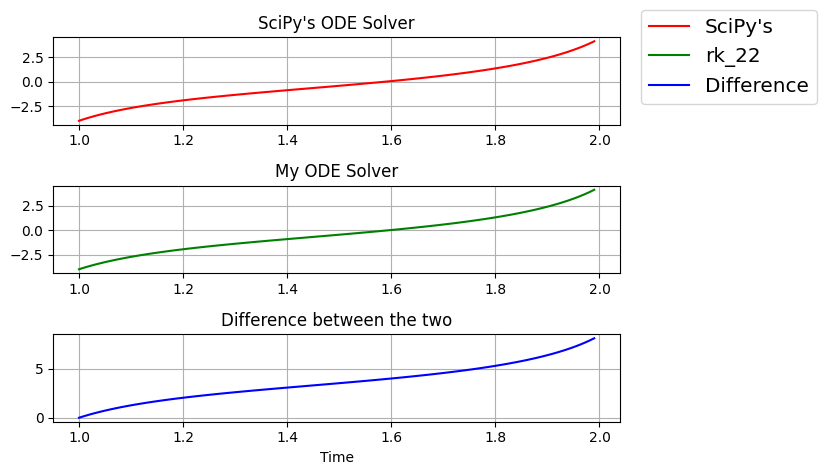

In [8]:
# This is the code for Problem 3 on Homework Two
## The problem asks us to code a RK2 in order to solve a differential equation

import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Function for Part B
# y_0,t_0 = -4.,1.
def fPB(y, t):
    return 1 + y**2 + t**3

def rk_22(y, t, h):
    N = 2
    #The time over a set line space from t->N, taking step of length h
    time = np.arange(t, N, h)    
    yVal = y    # Initial value is y_0
    k_1 = []    # Array of k_1
    k_2 = []    # Array of k_2
    y_PO = []   # Array for y Plus One
    y_PO = np.append(y_PO, y)       # Adds y_0 to the array of y values
    for i in range(len(time)-1):    # I have to make it this way because y_PO has one more element than time
        # For the following, any call to fPB refers to the given polynomial function.
        k_1 = np.append(k_1, h*fPB(y_PO[i], time[i]))     # Evaluates the first term of the approximation
        k_2 = np.append(k_2, h*fPB(y_PO[i] + (h*fPB(y_PO[i],time[i])/2.), time[i]+(h/2.)))  # Evaluates the second term of the approximation
        # Appends to the array of y_PO given the initial value y_0
        y_PO = np.append(y_PO, y_PO[i]+ h*fPB(y_PO[i]+(h*fPB(y_PO[i],time[i])), time[i]+(h/2.)))
        # Returns the time values and y_PO since I will be using those two sets
    return (time, y_PO)

def main():
    # The step that will be used is h = (t_f-t_i)/100 = 1/100 = 0.01
    # Calls my function with y_0 = -4, t_0 = 1, and h = 0.01
    xTwo,yTwo = rk_22(-4,1,0.01)
    # Calls the ODE solver
    y2 = odeint(fPB, -4, xTwo)
    # Plots ODE solver and time array
    # Plots my function and time array
    # Takes the difference from the plots and displays them
    fig, z = plt.subplots(3)
    z[0].plot(xTwo, y2, 'r')
    z[0].set_title("SciPy's ODE Solver")
    z[0].grid()
    z[1].plot(xTwo, yTwo, 'g')
    z[1].set_title("My ODE Solver")
    z[1].grid()
    z[2].plot(xTwo, (yTwo-y2)[0], 'b')
    z[2].set_title("Difference between the two")
    z[2].grid()
    fig.legend(["SciPy's", "rk_22", "Difference"],
               fontsize = 'x-large',bbox_to_anchor = (1.3,1),loc = 'upper right')
    plt.xlabel("Time")
    fig.tight_layout()
    plt.show()

# Calls on only the function main()
if __name__ == "__main__":
    main()

## Problem 4

Look again at what we did in class for the simple pendulum with a periodic driving force and damping. You may use that code, or write your own if you prefer, to explore.

a) With zero driving force and zero or small damping, start the system at $\theta=0$ and gradually increase the initial value of $\dot{\theta}$. Can you produce "over-the-top" motions?

Over the top motion occurs for values of theta dot of 2 and greater


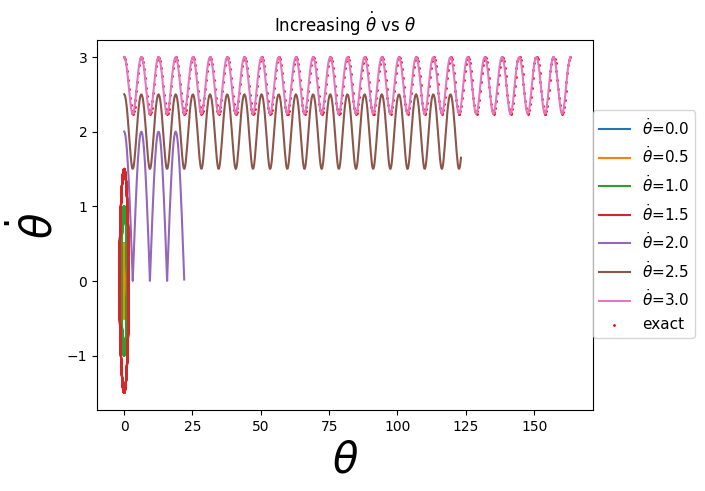

In [9]:
%matplotlib inline
import numpy as np
import scipy.integrate as integrate
# simple pendulum
def spenderivs0(Y, t):
    # let Y[0] be theta, Y[1] by theta_dot
    return [Y[1], -np.sin(Y[0])]
    # that is simple!

# Deletedthe values of theta = {1., 3.141, 0.1} and the values of theta_dot = {0.01}
theta0 = 0
thetadot0=0


# Definitions for the:
## Period
## Step
## total time
### Gets the time axis evenly spaced
T=2.*np.pi
h=T/50.     
ttot=10*T
t=np.arange(0.,ttot,h)

#Include the array for the varying theta_dot
thetadot0 = np.arange(0, 3.5, 0.5)

# Dimensions of the figure
figwidth=10
figheight=5
#

# Runs a loop that will increase the value of theta_dot
for i in range(len(thetadot0)):
    Y = integrate.odeint(spenderivs0, [theta0, thetadot0[i]], t)
    plt.plot(Y[:,0], Y[:,1],label = '$\\dot{\\theta}$='+f"{thetadot0[i]}")
    #plt.legend(loc='best',prop={'size':11})
print("Over the top motion occurs for values of theta dot of 2 and greater")
# Plots theta vs theta_dot[i]
plt.scatter(Y[:,0], Y[:,1], 1, 'r',label='exact')
plt.ylabel('$\\dot{\\theta}$', size=30)                 #labels
plt.xlabel('$\\theta$',size=30)
ysize=1.5*theta0
plt.legend(loc=(1,0.195),prop={'size':11})
plt.title("Increasing $\\dot{\\theta}$ vs $\\theta$")
#plt.grid()
plt.show()
#print(max(Y[:,0]))


b) Now make plots in phase space: make your own version of the plot in your textbook shown in figure 15.4 (p368) using your pendulum code and adjusting the parameters in whatever way you think is the clearest. Describe each of the main features. Explore what happens with the damping the driving forces at various strengths. 

For the following plots the divergence of the field is slowly growing positive.
As the Driving force and damping are increased, the field continues to expand until theta dot reaches 1.5.
This plot follows the same trend that the previous plot follows, showing the over the top motion once theta dot reaches values greater or equal to 1.5.


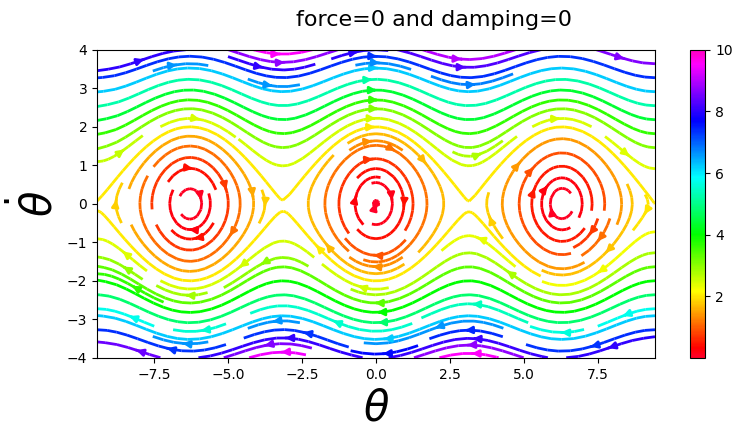

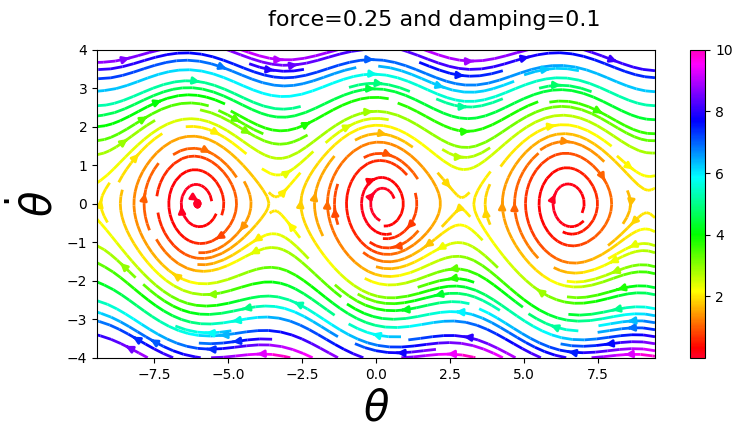

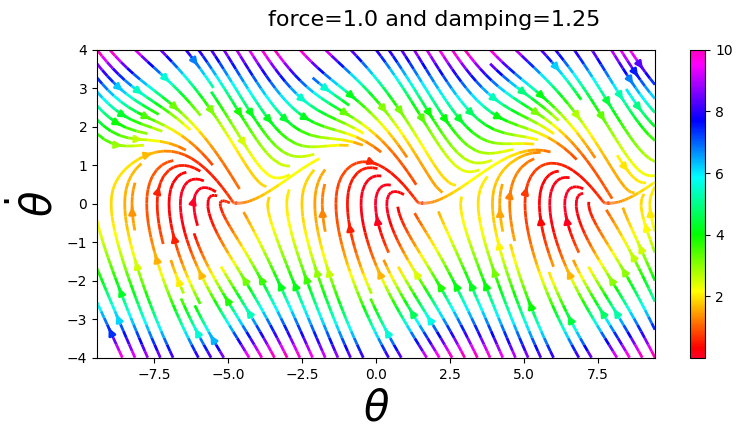

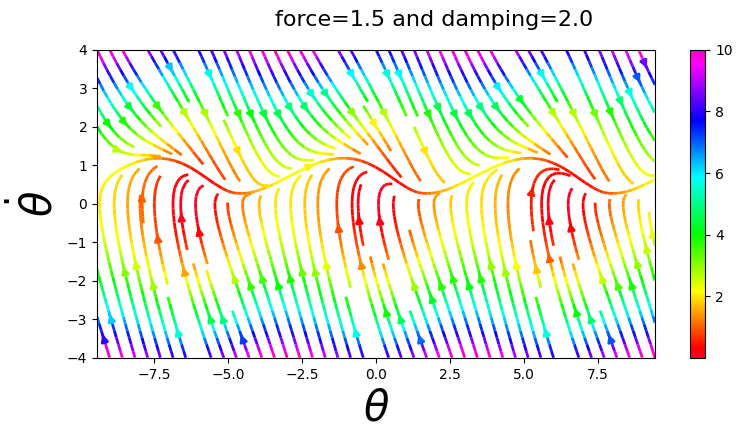

In [10]:
# I need to make the plot similar to the one found in page p.368 (Figure 15.4)

# Code from lecture 2:
## With Hance's approval
def spendfield(the, thedot, b, f, omega, time):
    return thedot, -np.sin(the)-b*thedot+f*np.cos(omega*time)



# Definition for the Phase Plotter
def PP(b, f, omega, time):
    # Gives the domains for:
    ## thedot (theta_dot) and the (theta)
    thedot, the = np.mgrid[-4.:4.:1000j, -3.*np.pi:3.*np.pi:1000j]
    # For loop that will cycle through the values in the set I will define
    for i in range(len(f)):
        U,V = spendfield(the, thedot, b[i], f[i], omega, time)
        # Energy Equation
        E=0.5*pow(thedot,2)+(1.-np.cos(the))
        # Defines figure ranges
        fig = plt.figure(1,[9.,4.])
        # Draws Axis
        ax=fig.gca()
        #fig0, ax0 = plt.subplots(len(f))
        ##
        # Plots the values taking into account all of the parameters
        ## 
        strm = ax.streamplot(the, thedot, U, V, color=E, linewidth=2, density=1.5, cmap=plt.cm.gist_rainbow)
        fig.colorbar(strm.lines)
        fig.suptitle(f'force={f[i]} and damping={b[i]}'.format(f, b), fontsize=16)
        ax.set_xlabel('$\\theta$', size=30)                 #labels
        ax.set_ylabel('$\\dot{\\theta}$',size=30)
        plt.show()

# Main function that will input the variable for PP function
def main():
    f = [0, 0.25, 1., 1.50]
    b = [0, 0.1, 1.25, 2.]
    omega = 0
    time = 0
    print("For the following plots the divergence of the field is slowly growing positive.")
    print("As the Driving force and damping are increased, the field continues to expand until theta dot reaches 1.5.")
    print("This plot follows the same trend that the previous plot follows, showing the over the top motion once theta dot reaches values greater or equal to 1.5.")
    PP(b, f, omega, time)
        
# Calls on only the function main()
if __name__ == "__main__":
    main()
        

c) Read section 15.2.1 and try to find at least one of the types of complex behaviors described there in your oscillator. If you need a start, you might find section 15.2.2 helpful. Show and explain your results. (Some of you might want to pursue this topic further in your project.)

For this plot the starting of value of theta differs from that of theta dot, making it pull the starting position and allowing more paths to be drawn. The plot also shows that the path is located strictly between theta dot values of -1 and 1, giving it its overall oval shape.


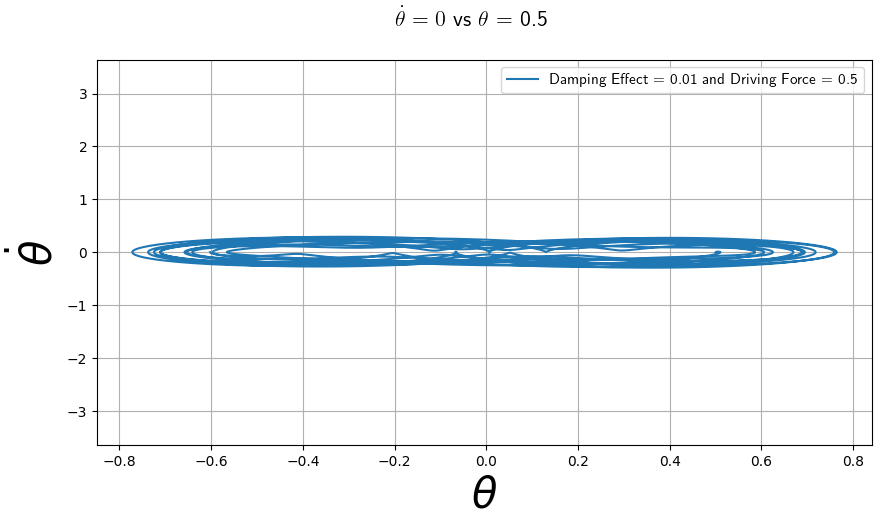

This plot has far less concentric paths about the plus/minus 0.5 horizontal component, relative to the first plot. This plot is still bounded from -1 to 1.


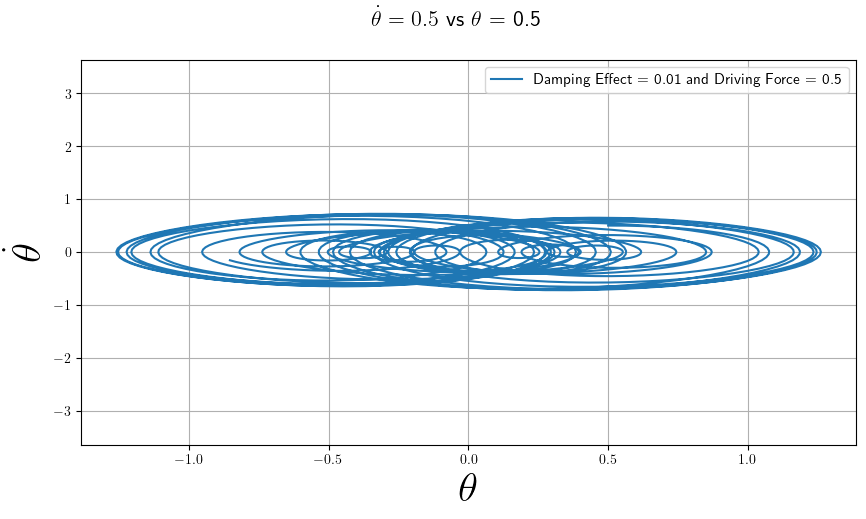

As the value of the angular speed changes, the plot seems to spread out more, showing it will spread pas .


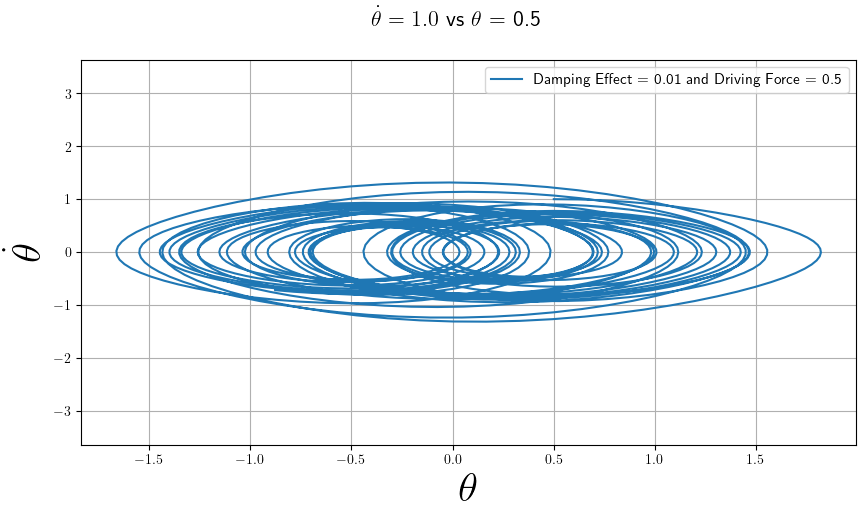

This plot shows the behavior when theta dot is greater than both the damping and driving force. Clearly it breaks past the usual bounds of [-1,1], showing the over the top motion occurs at theta dot greater than or equal to 1.5.


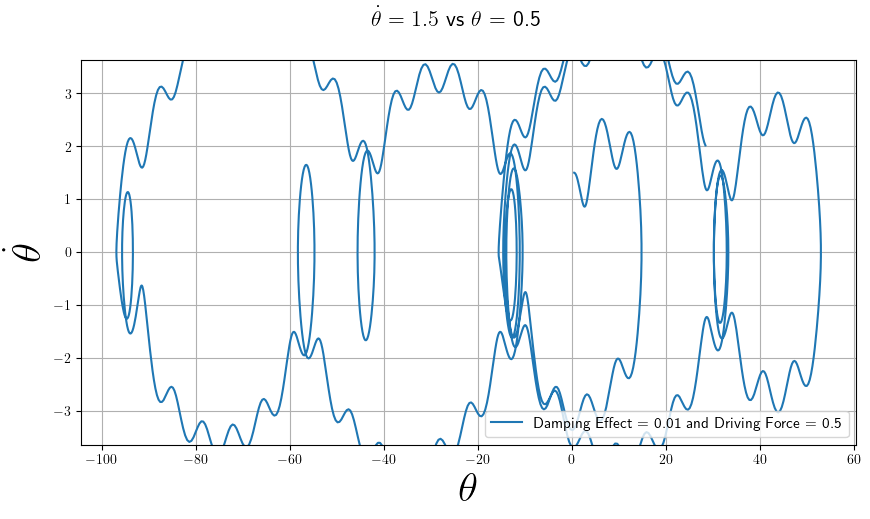

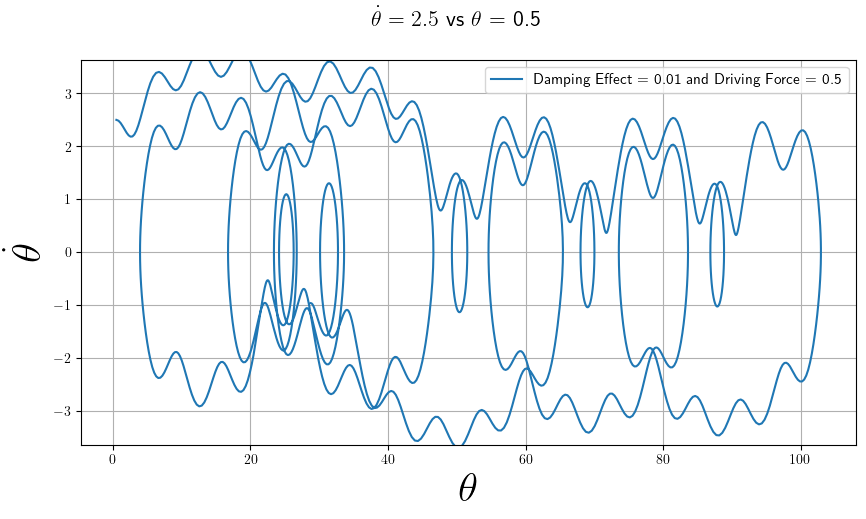

In [11]:
# Code from lecture 2:
## With Hance's approval
# simple pendulum with damping
# I'll only use this once here, but for re-use I pass b,f, omega as arguments
# Need to make the plots for different periods, that will give different paths on the plot
# Also should make it for different values of thetadot
## The values that seem interesting are thetadot0 ={0, 1.25, 2.5, 5}

def spenderivs(Y, t, b, f, omega):
    # let Y[0] be \theta, Y[1] by \dot{\theta}
    return [Y[1], -np.sin(Y[0])-b*Y[1]+f*np.cos(omega*t)]

def main():
    #################################
    # Parameters used in spenderivs #
    #################################
    theta0=0.5
    thetadot0 = [0, 0.5, 1., 1.5, 2.5]
    T=2.*np.pi
    h=T/50.     
    ttot=35.*T
    t=np.arange(0.,ttot,h)
    #
    b=.01
    f=0.5
    omega=.3
    #####################################
    # Text that will explain the behvior#
    #####################################
    txt1 = "For this plot the starting of value of theta differs from that of theta dot, making it pull the starting position and allowing more paths to be drawn. The plot also shows that the path is located strictly between theta dot values of -1 and 1, giving it its overall oval shape."
    txt2 = "This plot has far less concentric paths about the plus/minus 0.5 horizontal component, relative to the first plot. This plot is still bounded from -1 to 1."
    txt3 = "As the value of the angular speed changes, the plot seems to spread out more, showing it will spread pas ."
    txt4 = "This plot shows the behavior when theta dot is greater than both the damping and driving force. Clearly it breaks past the usual bounds of [-1,1], showing the over the top motion occurs at theta dot greater than or equal to 1.5."
    txt5 = ""
    txtA = [txt1, txt2, txt3, txt4, txt5]
    ############
    #Dimensions#
    ############
    figwidth=10
    figheight=5
    ############
    for i in range(len(thetadot0)):
        Y = integrate.odeint(spenderivs, [theta0, thetadot0[i]], t, args=(b,f,omega))
        fig5=plt.figure(5,[figwidth,figheight])
        ax=fig5.gca()
        ax.grid(True)
        plt.rc('text', usetex=True)
        fig5.suptitle("$\\dot{\\theta}="+f"{thetadot0[i]}$".format(thetadot0) + f" vs $\\theta$ = {theta0}".format(theta0), fontsize=16)
        print(txtA[i])
        plt.plot(Y[:,0], Y[:,1], label=f"Damping Effect = {b} and Driving Force = {f}".format(f,b))
        ax.set_xlabel('$\\theta$', size=30)                 #labels
        plt.ylabel('$\\dot{\\theta}$',size=30)
        ysize=np.pi+0.5
        ax.set_ylim([-ysize, ysize])
        plt.legend(loc='best',prop={'size':11})
        plt.show()
    

# Calls on only the function main()
if __name__ == "__main__":
    main()
